<a href="https://www.kaggle.com/code/mennatullaheisawy/churn-prediction-by-ml-algos-anns-test-acc-93?scriptVersionId=184941670" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, accuracy_score

2024-06-22 19:57:44.263284: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 19:57:44.263366: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 19:57:44.265052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Read the Dataset

In [2]:
data = pd.read_excel('/kaggle/input/customer-churn/Telco_customer_churn.csv.xlsx')


In [3]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## EDA and Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
data.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

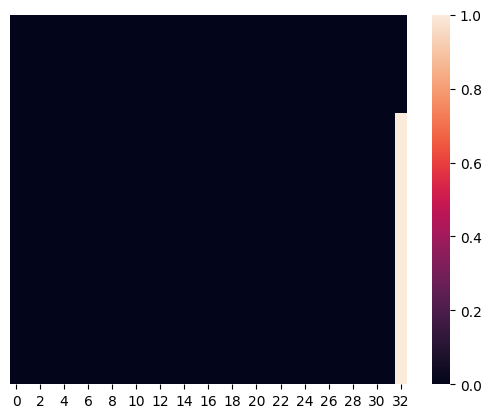

In [7]:
nan_heat_map = data.isna()
sns.heatmap(np.array(nan_heat_map), yticklabels=False);

In [8]:
# skip the id to check for duplicated rows
data.iloc[:,1:].duplicated().sum() 

0

In [9]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

#### Check the importance of each column to decide keeping or droping it

In [10]:
# firstly add the CustomerID to the drop list 
drop_list = ['CustomerID']

In [11]:
data['Count'].describe()

count    7043.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Count, dtype: float64

In [12]:
data['Count'].value_counts()

Count
1    7043
Name: count, dtype: int64

In [13]:
# The Count is useless as it does not represent any information
drop_list.append('Count')

In [14]:
data['Country'].describe()

count              7043
unique                1
top       United States
freq               7043
Name: Country, dtype: object

In [15]:
data['Country'].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [16]:
#  it has one value 
drop_list.append('Country')

In [17]:
data['State'].describe()

count           7043
unique             1
top       California
freq            7043
Name: State, dtype: object

In [18]:
#  it has one value 
drop_list.append('State')

In [19]:
data['City'].describe()

count            7043
unique           1129
top       Los Angeles
freq              305
Name: City, dtype: object

In [20]:
data['City'].value_counts().sort_values(ascending=False)

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Death Valley        4
Essex               4
Chilcoot            4
Forest Falls        4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

In [21]:
data['Zip Code'].describe()

count     7043.000000
mean     93521.964646
std       1865.794555
min      90001.000000
25%      92102.000000
50%      93552.000000
75%      95351.000000
max      96161.000000
Name: Zip Code, dtype: float64

In [22]:
data['Zip Code'].value_counts()

Zip Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64

In [23]:
data['Zip Code'].nunique()

1652

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


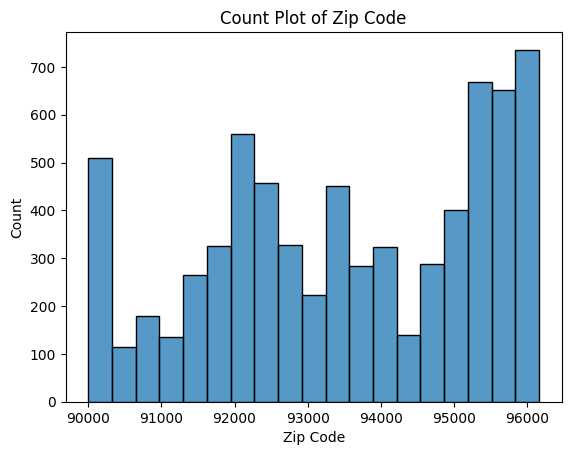

In [24]:
sns.histplot(data['Zip Code'])
plt.title("Count Plot of Zip Code")
plt.show()

* as the zip codes originally represnets the cities so dropping any thing related to location and address and keep the zip codes to represent them all

In [25]:
drop_list.extend(['City','Lat Long', 'Latitude', 'Longitude'])
drop_list

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Latitude',
 'Longitude']

In [26]:
data['Gender'].describe()

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object

In [27]:
data['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

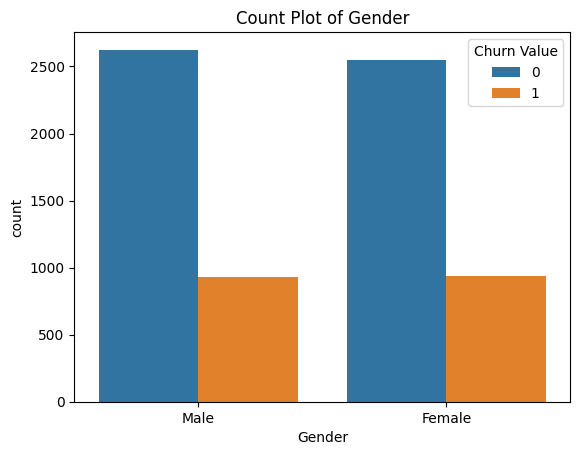

In [28]:
sns.countplot(x=data['Gender'], hue=data['Churn Value'])
plt.title("Count Plot of Gender")
plt.show()

In [29]:
# the gender has no strong relation with the target column as they have equal percentages
drop_list.append('Gender')

In [30]:
data['Senior Citizen'].describe()

count     7043
unique       2
top         No
freq      5901
Name: Senior Citizen, dtype: object

In [31]:
data['Senior Citizen'].value_counts()

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

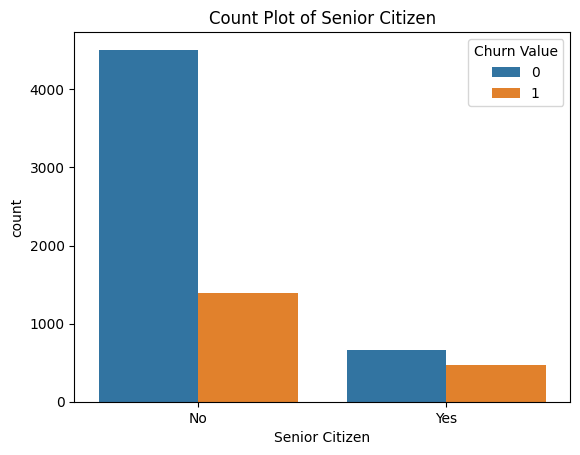

In [32]:
sns.countplot(x=data['Senior Citizen'],hue=data['Churn Value'])
plt.title("Count Plot of Senior Citizen")
plt.show()

In [33]:
data['Partner'].describe()

count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

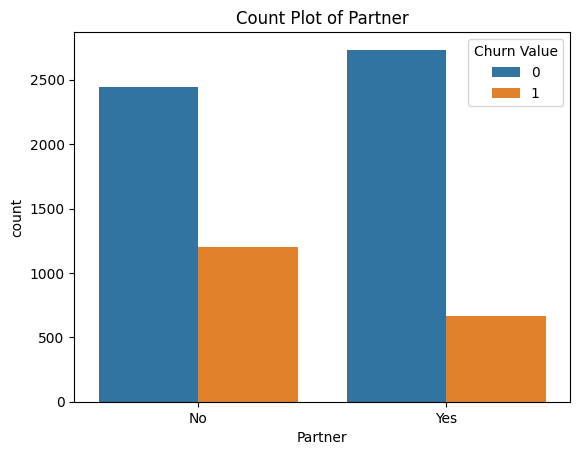

In [34]:
sns.countplot(x=data['Partner'],hue=data['Churn Value'])
plt.title("Count Plot of Partner")
plt.show()

In [35]:
data['Dependents'].describe()

count     7043
unique       2
top         No
freq      5416
Name: Dependents, dtype: object

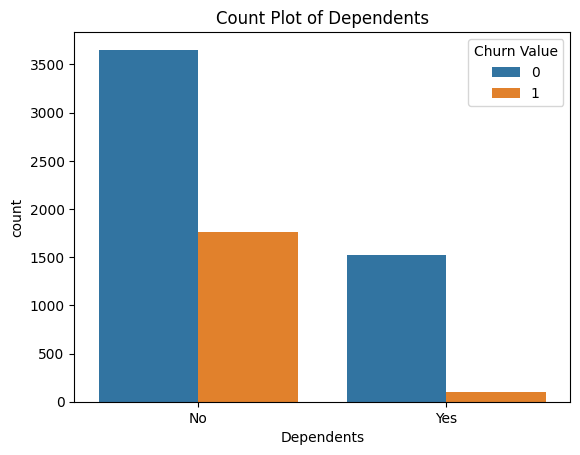

In [36]:
sns.countplot(x=data['Dependents'],hue=data['Churn Value'])
plt.title("Count Plot of Dependents")
plt.show()

the majority of customers who have no dependants did not churn

In [37]:
data['Tenure Months'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

In [38]:
data['Tenure Months'].value_counts().sort_values(ascending=False)

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


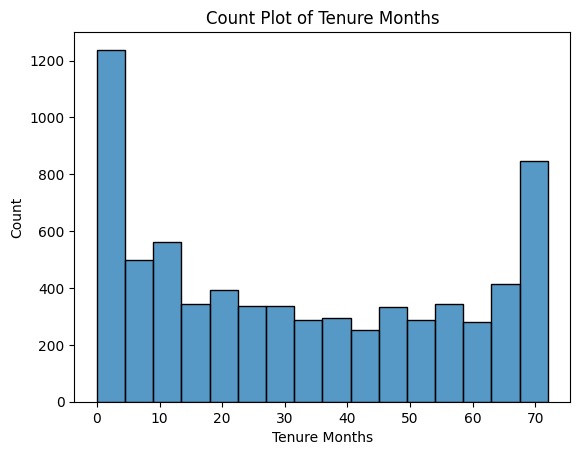

In [39]:
sns.histplot(data['Tenure Months'])
plt.title("Count Plot of Tenure Months")
plt.show()

In [40]:
data['Phone Service'].describe()

count     7043
unique       2
top        Yes
freq      6361
Name: Phone Service, dtype: object

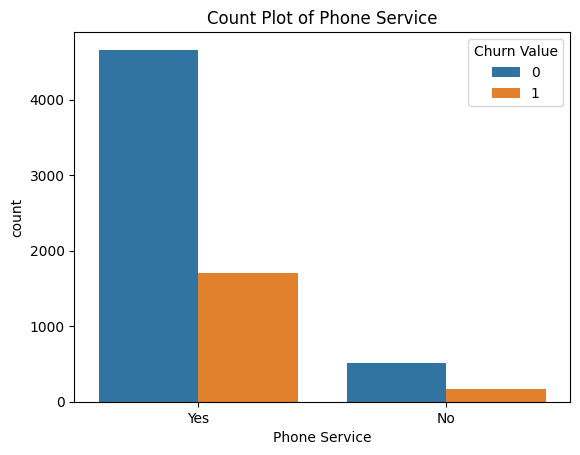

In [41]:
sns.countplot(x=data['Phone Service'],hue=data['Churn Value'])
plt.title("Count Plot of Phone Service")
plt.show()

* the majority of customers who had phone service did not churn

In [42]:
data['Multiple Lines'].describe()

count     7043
unique       3
top         No
freq      3390
Name: Multiple Lines, dtype: object

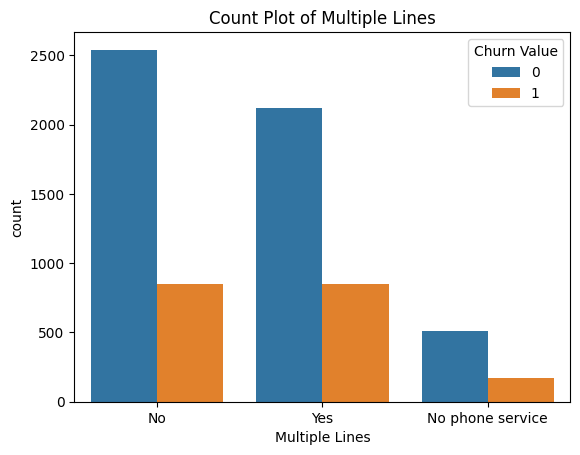

In [43]:
sns.countplot(x=data['Multiple Lines'],hue=data['Churn Value'])
plt.title("Count Plot of Multiple Lines")
plt.show()

In [44]:
data['Internet Service'].describe()

count            7043
unique              3
top       Fiber optic
freq             3096
Name: Internet Service, dtype: object

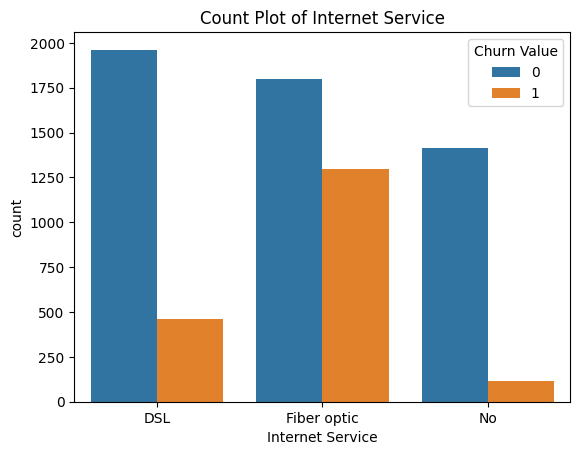

In [45]:
sns.countplot(x=data['Internet Service'],hue=data['Churn Value'])
plt.title("Count Plot of Internet Service")
plt.show()

* most of customers who have fiber optic have churned
- maybe there is a reason related to this service

In [46]:
data['Online Security'].describe()

count     7043
unique       3
top         No
freq      3498
Name: Online Security, dtype: object

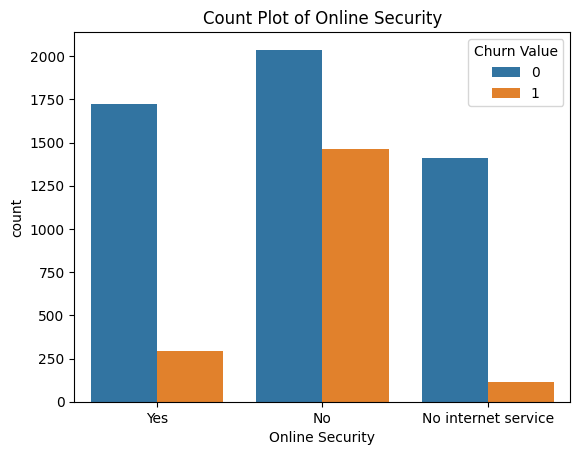

In [47]:
sns.countplot(x=data['Online Security'],hue=data['Churn Value'])
plt.title("Count Plot of Online Security")
plt.show()

* most of customers who don't have online security have churned while most of who have haven't churned
- maybe there is a reason related to this service

In [48]:
data['Online Backup'].describe()

count     7043
unique       3
top         No
freq      3088
Name: Online Backup, dtype: object

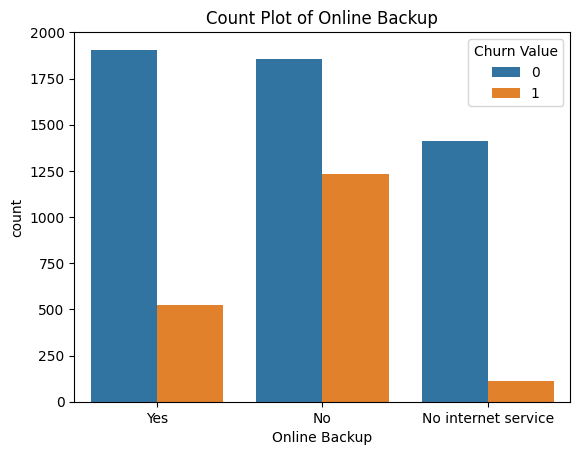

In [49]:
sns.countplot(x=data['Online Backup'],hue=data['Churn Value'])
plt.title("Count Plot of Online Backup")
plt.show()

In [50]:
data['Device Protection'].describe()

count     7043
unique       3
top         No
freq      3095
Name: Device Protection, dtype: object

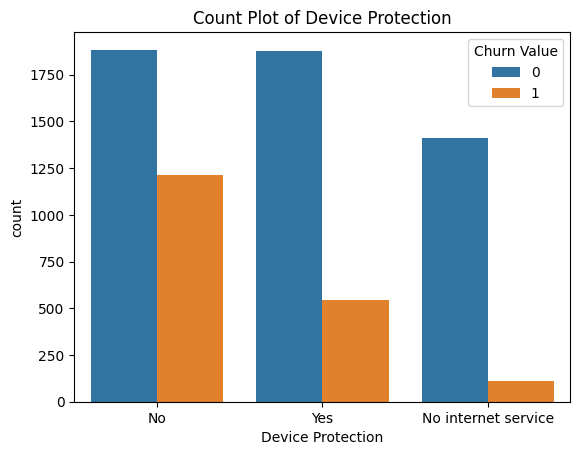

In [51]:
sns.countplot(x=data['Device Protection'],hue=data['Churn Value'])
plt.title("Count Plot of Device Protection")
plt.show()

* most of customers who don't have device protection haven't churned and most of who have also haven't churned 
* but there is a considerable percentage regarding the customers who don't have the service and also churned

In [52]:
data['Tech Support'].describe()

count     7043
unique       3
top         No
freq      3473
Name: Tech Support, dtype: object

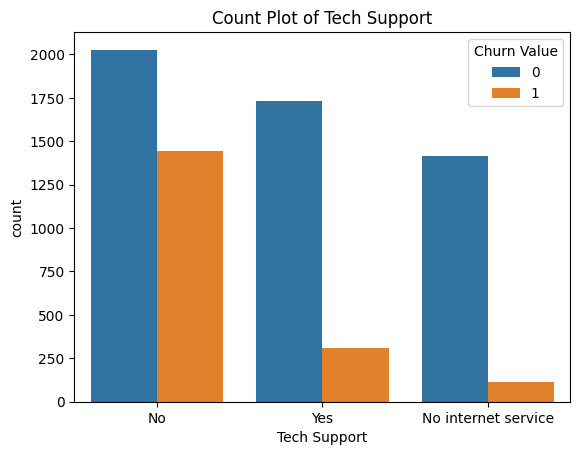

In [53]:
sns.countplot(x=data['Tech Support'],hue=data['Churn Value'])
plt.title("Count Plot of Tech Support")
plt.show()

* most of customers who don't have tech support haven't churned and most of who have also haven't churned 
* but there is a considerable percentage regarding the customers who don't have the service and also churned

In [54]:
data['Streaming TV'].describe()

count     7043
unique       3
top         No
freq      2810
Name: Streaming TV, dtype: object

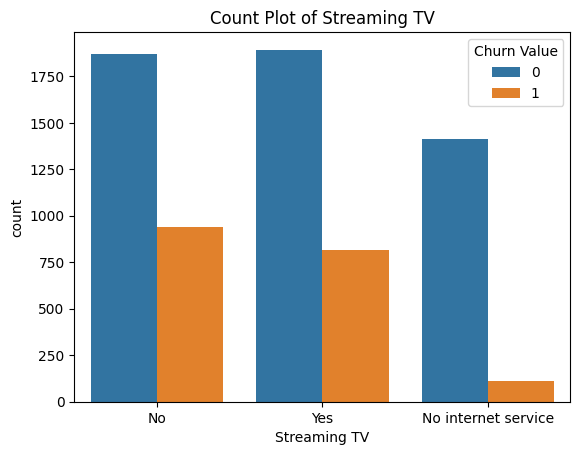

In [55]:
sns.countplot(x=data['Streaming TV'],hue=data['Churn Value'])
plt.title("Count Plot of Streaming TV")
plt.show()

* the percentages in the service options are nearly equal so it will have no effect on the final decision.

In [56]:
drop_list.append('Streaming TV')

In [57]:
data['Streaming Movies'].describe()

count     7043
unique       3
top         No
freq      2785
Name: Streaming Movies, dtype: object

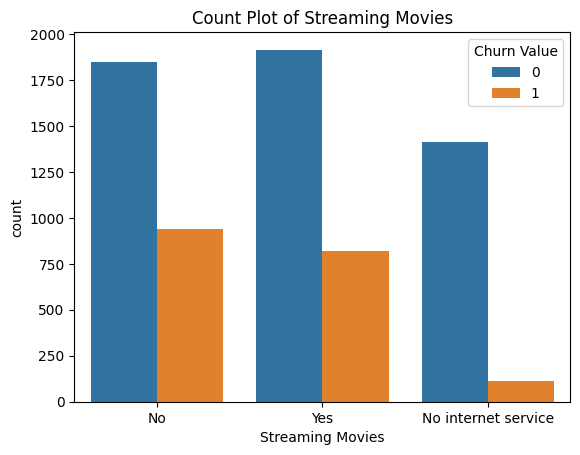

In [58]:
sns.countplot(x=data['Streaming Movies'],hue=data['Churn Value'])
plt.title("Count Plot of Streaming Movies")
plt.show()

* the percentages in the service options are nearly equal so it will have no effect on the final decision.

In [59]:
drop_list.append('Streaming Movies')

In [60]:
data['Contract'].describe()

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

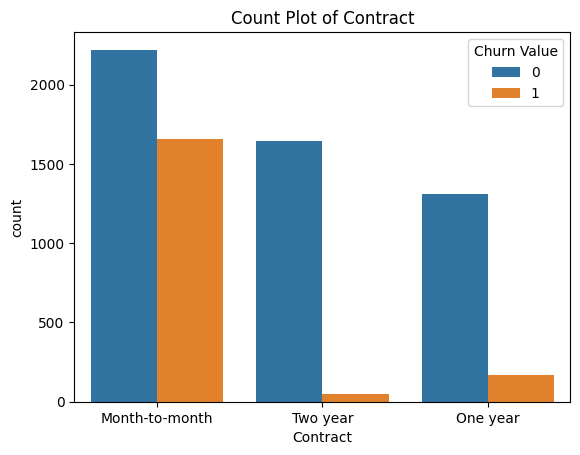

In [61]:
sns.countplot(x=data['Contract'],hue=data['Churn Value'])
plt.title("Count Plot of Contract")
plt.show()

* most of customers who had month_to_month contract have churned but a few of two year contract have churned 
* this conclude that it's not something related to longtern contracts

In [62]:
data['Paperless Billing'].describe()

count     7043
unique       2
top        Yes
freq      4171
Name: Paperless Billing, dtype: object

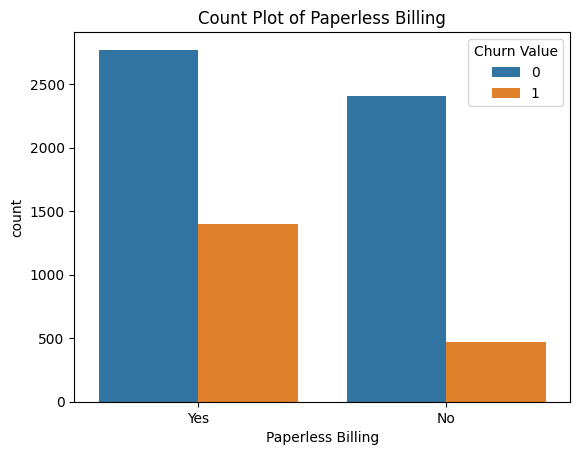

In [63]:
sns.countplot(x=data['Paperless Billing'],hue=data['Churn Value'])
plt.title("Count Plot of Paperless Billing")
plt.show()

* this column has an equal effect on both classes with the final target

In [64]:
drop_list.append('Paperless Billing')

In [65]:
data['Payment Method'].describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: Payment Method, dtype: object

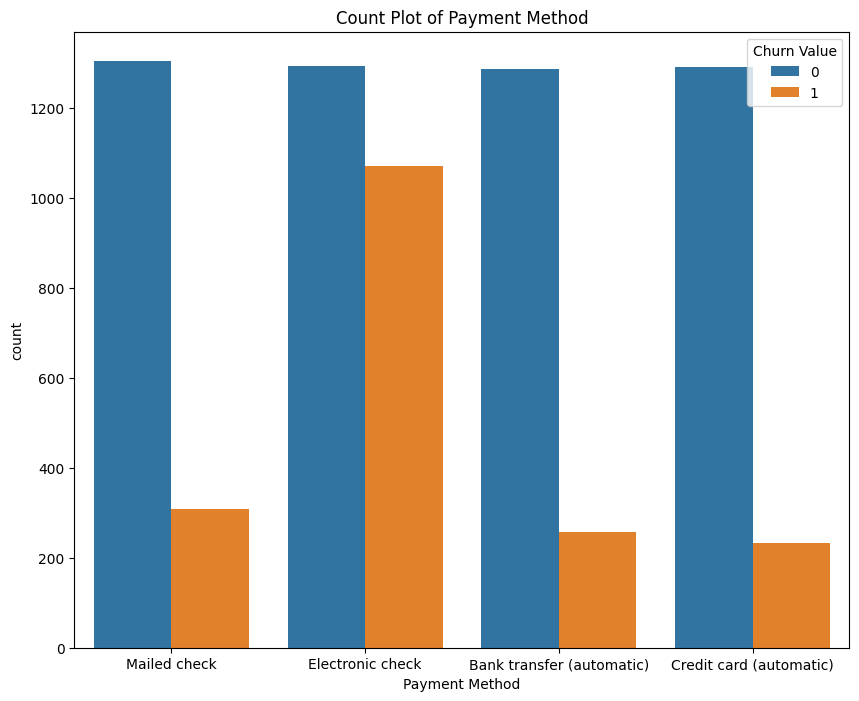

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['Payment Method'],hue=data['Churn Value'])
plt.title("Count Plot of Payment Method")
plt.show()

*  most of customers who had electronic check, have churned. 
* there must has a relation with this class of this service

In [67]:
data['Monthly Charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


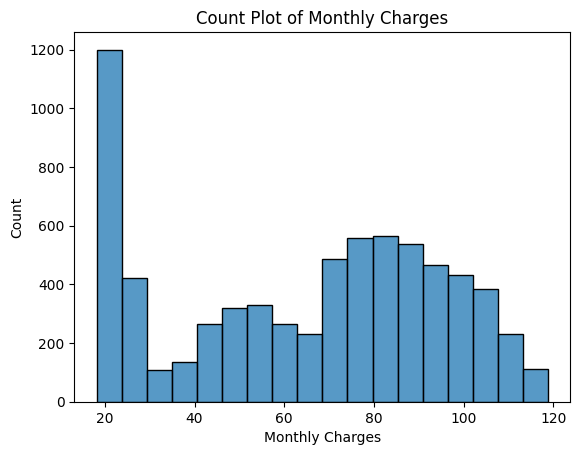

In [68]:
sns.histplot(data['Monthly Charges'])
plt.title("Count Plot of Monthly Charges")
plt.show()

In [69]:
data['Total Charges'].describe()

count     7043.0
unique    6531.0
top         20.2
freq        11.0
Name: Total Charges, dtype: float64

In [70]:
data['Total Charges'].value_counts(ascending=True).index

Index([ 108.15,  3581.6,     912,  445.85,  186.15,     435,   178.8,  5817.7,
          1929, 6936.85,
       ...
         20.15,   20.25,    45.3,   19.55,   20.05,   19.65,    19.9,   19.75,
          20.2,     ' '],
      dtype='object', name='Total Charges', length=6531)

In [71]:
# there is an empty string in this column that is causin an error when ploting so i will drop the row
data[data['Total Charges']==' '].index

Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')

In [72]:
data.drop(data[data['Total Charges']==' '].index, axis=0, inplace=True)
data[data['Total Charges']==' '].describe()['Count']

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Count, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


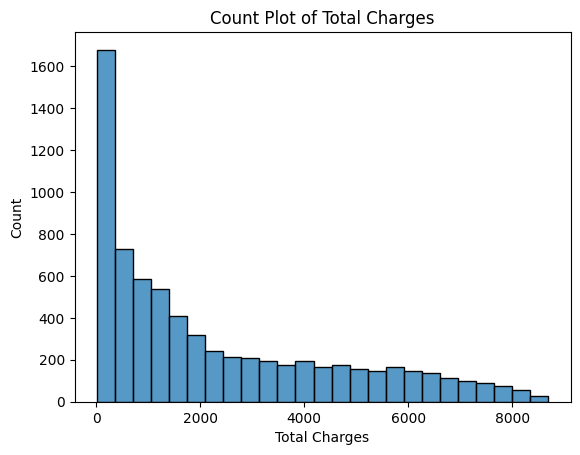

In [73]:
sns.histplot(data['Total Charges'])
plt.title("Count Plot of Total Charges")
plt.show()

In [74]:
data['Churn Label'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn Label, dtype: object

In [75]:
data['Churn Label'].value_counts()

Churn Label
No     5163
Yes    1869
Name: count, dtype: int64

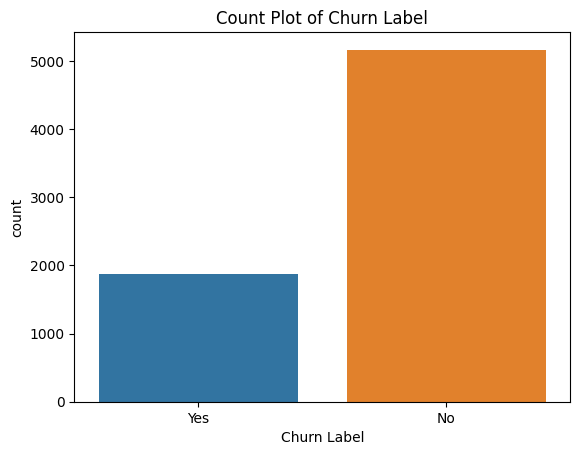

In [76]:
sns.countplot(x=data['Churn Label'])
plt.title("Count Plot of Churn Label")
plt.show()

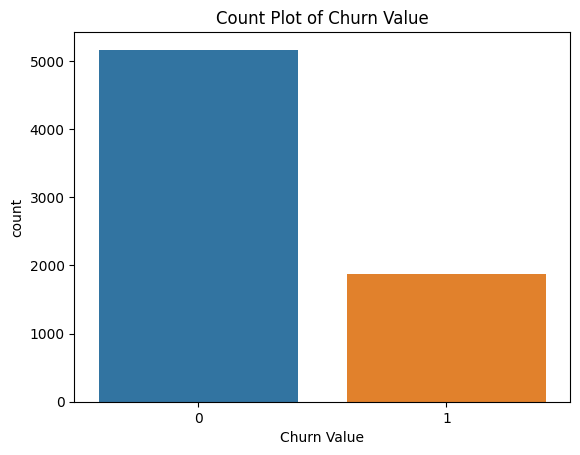

In [77]:
sns.countplot(x=data['Churn Value'])
plt.title("Count Plot of Churn Value")
plt.show()

* churn label is churn value but before encoding so no need for it

In [78]:
drop_list.append('Churn Label')

In [79]:
data['Churn Score'].describe()

count    7032.000000
mean       58.715301
std        21.531321
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


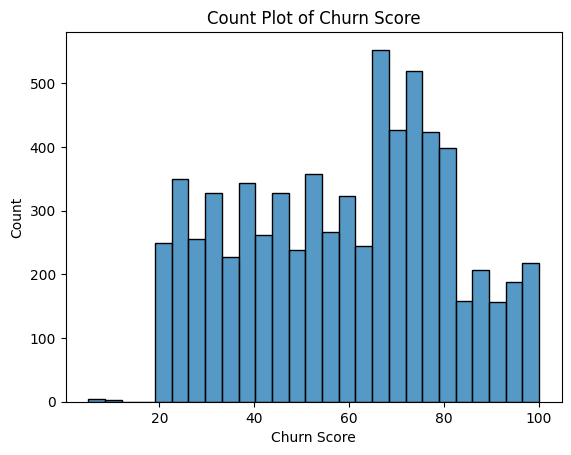

In [80]:
sns.histplot(data['Churn Score'])
plt.title("Count Plot of Churn Score")
plt.show()

In [81]:
data['Churn Score'].value_counts(ascending=False)

Churn Score
80    151
71    148
77    145
67    143
76    141
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 85, dtype: int64

In [82]:
# I will consider that values 9,8,7,5 are minors combared to the frequency of others
data.drop(data[data['Churn Score']==9].index, axis=0, inplace=True)
data.drop(data[data['Churn Score']==8].index, axis=0, inplace=True)
data.drop(data[data['Churn Score']==7].index, axis=0, inplace=True)
data.drop(data[data['Churn Score']==5].index, axis=0, inplace=True)
data['Churn Score'].value_counts(ascending=False)

Churn Score
80    151
71    148
77    145
67    143
76    141
     ... 
93     47
94     46
91     45
95     43
88     33
Name: count, Length: 81, dtype: int64

In [83]:
data['CLTV'].describe()

count    7024.000000
mean     4401.178673
std      1182.373805
min      2003.000000
25%      3469.000000
50%      4526.500000
75%      5381.000000
max      6500.000000
Name: CLTV, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


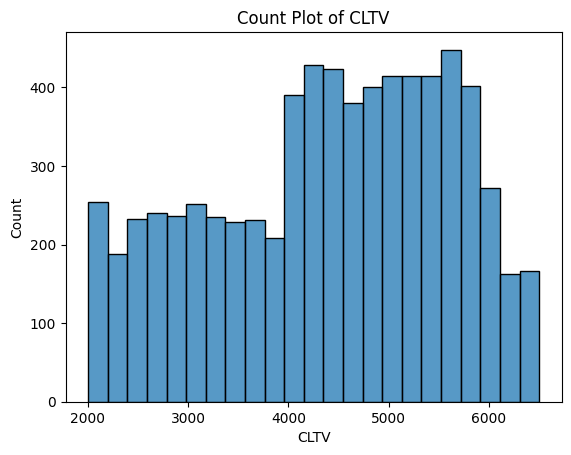

In [84]:
sns.histplot(data['CLTV'])
plt.title("Count Plot of CLTV")
plt.show()

In [85]:
data['Churn Reason'].describe()

count                           1869
unique                            20
top       Attitude of support person
freq                             192
Name: Churn Reason, dtype: object

In [86]:
data['Churn Reason'].isna().sum()

5155

In [87]:
# because of too many nans, drop it
drop_list.append('Churn Reason')
drop_list

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Latitude',
 'Longitude',
 'Gender',
 'Streaming TV',
 'Streaming Movies',
 'Paperless Billing',
 'Churn Label',
 'Churn Reason']

#### Now lets drop the chosen columns

In [88]:
data.drop(columns=drop_list, axis=1, inplace=True)
data.head()

,Zip Code,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,90003,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1,86,3239
1,90005,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,1,67,2701
2,90006,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Electronic check,99.65,820.5,1,86,5372
3,90010,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,1,84,5003
4,90015,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Bank transfer (automatic),103.70,5036.3,1,89,5340


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7024 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip Code           7024 non-null   int64  
 1   Senior Citizen     7024 non-null   object 
 2   Partner            7024 non-null   object 
 3   Dependents         7024 non-null   object 
 4   Tenure Months      7024 non-null   int64  
 5   Phone Service      7024 non-null   object 
 6   Multiple Lines     7024 non-null   object 
 7   Internet Service   7024 non-null   object 
 8   Online Security    7024 non-null   object 
 9   Online Backup      7024 non-null   object 
 10  Device Protection  7024 non-null   object 
 11  Tech Support       7024 non-null   object 
 12  Contract           7024 non-null   object 
 13  Payment Method     7024 non-null   object 
 14  Monthly Charges    7024 non-null   float64
 15  Total Charges      7024 non-null   object 
 16  Churn Value        7024 non-n

#### Encoding

In [90]:
def columns_lencoder(data):
    le = LabelEncoder()
    for col in data.columns:
        data[col] = le.fit_transform(data[col])
    return data

In [91]:
obj_cols= data.select_dtypes(include=['object'])
obj_cols

,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Payment Method,Total Charges
0,No,No,No,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,108.15
1,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check,151.65
2,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Electronic check,820.5
3,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check,3046.05
4,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Bank transfer (automatic),5036.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),1419.4
7039,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,One year,Mailed check,1990.5
7040,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,One year,Credit card (automatic),7362.9
7041,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,Month-to-month,Electronic check,346.45


- total charges has a float data not object so i will convert it later to float

In [92]:
obj_cols.drop(columns=['Total Charges'], axis=1, inplace=True)
obj_cols

,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Payment Method
0,No,No,No,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Mailed check
1,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check
2,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Electronic check
3,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check
4,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic)
7039,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,One year,Mailed check
7040,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,One year,Credit card (automatic)
7041,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,Month-to-month,Electronic check


In [93]:
data[obj_cols.columns] = columns_lencoder(obj_cols)
data.sample(5)

,Zip Code,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
4828,93426,0,1,1,7,1,0,0,2,2,2,0,1,2,69.45,477.05,0,54,3334
404,96007,0,1,0,5,1,0,1,0,0,0,0,0,2,69.95,330.15,1,81,2969
5480,96059,0,1,1,47,1,2,1,2,2,2,2,1,0,113.45,5317.8,0,35,3729
1349,91105,0,1,0,44,1,2,1,0,0,0,0,0,2,96.10,4364.1,1,87,5606
1065,93523,0,0,0,3,0,1,0,0,2,0,0,0,2,50.60,155.35,1,83,4800


Now, I will conver 

In [94]:
data['Total Charges'] = data['Total Charges'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7024 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip Code           7024 non-null   int64  
 1   Senior Citizen     7024 non-null   int64  
 2   Partner            7024 non-null   int64  
 3   Dependents         7024 non-null   int64  
 4   Tenure Months      7024 non-null   int64  
 5   Phone Service      7024 non-null   int64  
 6   Multiple Lines     7024 non-null   int64  
 7   Internet Service   7024 non-null   int64  
 8   Online Security    7024 non-null   int64  
 9   Online Backup      7024 non-null   int64  
 10  Device Protection  7024 non-null   int64  
 11  Tech Support       7024 non-null   int64  
 12  Contract           7024 non-null   int64  
 13  Payment Method     7024 non-null   int64  
 14  Monthly Charges    7024 non-null   float64
 15  Total Charges      7024 non-null   float64
 16  Churn Value        7024 non-n

#### X, y splitting

In [95]:
X = data.drop(columns=['Churn Value'], axis=1)
y = data['Churn Value']
print(X.shape, y.shape)

(7024, 18) (7024,)


#### Scaling

In [96]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[3.24675325e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.03104085e-02, 8.25000000e-01, 2.74849900e-01],
       [6.49350649e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.53300254e-02, 5.87500000e-01, 1.55214588e-01],
       [8.11688312e-04, 0.00000000e+00, 0.00000000e+00, ...,
        9.25109624e-02, 8.25000000e-01, 7.49166111e-01],
       ...,
       [3.73863636e-01, 0.00000000e+00, 1.00000000e+00, ...,
        8.47461343e-01, 6.37500000e-01, 7.90971759e-01],
       [3.74025974e-01, 0.00000000e+00, 1.00000000e+00, ...,
        3.78086776e-02, 4.87500000e-01, 1.75672671e-01],
       [3.74512987e-01, 0.00000000e+00, 0.00000000e+00, ...,
        7.87641357e-01, 2.25000000e-01, 6.88014232e-01]])

#### Train Test Split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6321, 18)
(6321,)
(703, 18)
(703,)


## Models

### ML Algorithms

In [98]:
accuracy_df = pd.DataFrame(columns=['Model Name','Train_Accuracy', 'Test_Accuracy'])
accuracy_df

,Model Name,Train_Accuracy,Test_Accuracy


In [99]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 3)
train_accuracy = round(lr.score(X_train, y_train) * 100, 3)
print(f'Training Accuracy: {train_accuracy}%')
print(f'Testing Accuracy: {accuracy_percentage}%')
accuracy_df.loc[len(accuracy_df)] = ['LogisticRegression',train_accuracy,accuracy_percentage]

Training Accuracy: 92.09%
Testing Accuracy: 92.603%


In [100]:
svc = SVC(C=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 3)
train_accuracy = round(svc.score(X_train, y_train) * 100, 3)
print(f'Training Accuracy: {train_accuracy}%')
print(f'Testing Accuracy: {accuracy_percentage}%')
accuracy_df.loc[len(accuracy_df)] = ['SVC',train_accuracy,accuracy_percentage]

Training Accuracy: 93.34%
Testing Accuracy: 91.465%


In [101]:
bclf_rfc = BaggingClassifier(estimator=lr,n_estimators=150, random_state=5 )
bclf_rfc.fit(X_train, y_train)
y_pred = bclf_rfc.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 3)
train_accuracy = round(bclf_rfc.score(X_train, y_train) * 100, 3)
print(f'Training Accuracy: {train_accuracy}%')
print(f'Testing Accuracy: {accuracy_percentage}%')
accuracy_df.loc[len(accuracy_df)] = ['BaggingClassifier',train_accuracy,accuracy_percentage]

Training Accuracy: 92.09%
Testing Accuracy: 92.603%


In [102]:
xgbc = XGBClassifier(n_estimators=200, random_state=42, learning_rate=0.01)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 3)
train_accuracy = round(xgbc.score(X_train, y_train) * 100, 3)
print(f'Training Accuracy: {train_accuracy}%')
print(f'Testing Accuracy: {accuracy_percentage}%')
accuracy_df.loc[len(accuracy_df)] = ['XGBClassifier',train_accuracy,accuracy_percentage]

Training Accuracy: 94.162%
Testing Accuracy: 93.03%


In [103]:
catboost = CatBoostClassifier(learning_rate=0.01,random_seed=42, n_estimators=200, verbose=0)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)


# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 3)
train_accuracy = round(catboost.score(X_train, y_train) * 100, 3)
print(f'Training Accuracy: {train_accuracy}%')
print(f'Testing Accuracy: {accuracy_percentage}%')
accuracy_df.loc[len(accuracy_df)] = ['CatBoostClassifier',train_accuracy,accuracy_percentage]

Training Accuracy: 93.767%
Testing Accuracy: 92.745%


In [104]:
lgbm = LGBMClassifier(learning_rate=0.01, n_estimators=150, random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)


# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 3)
train_accuracy = round(lgbm.score(X_train, y_train) * 100, 3)
print(f'Training Accuracy: {train_accuracy}%')
print(f'Testing Accuracy: {accuracy_percentage}%')
accuracy_df.loc[len(accuracy_df)] = ['LGBMClassifier',train_accuracy,accuracy_percentage]

[LightGBM] [Info] Number of positive: 1669, number of negative: 4652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 6321, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264040 -> initscore=-1.025073
[LightGBM] [Info] Start training from score -1.025073
Training Accuracy: 95.27%
Testing Accuracy: 92.176%


##### ML Models Accuracies Concolusion

In [105]:
accuracy_df.sort_values(ascending=False, by='Test_Accuracy')

,Model Name,Train_Accuracy,Test_Accuracy
3,XGBClassifier,94.162,93.030
4,CatBoostClassifier,93.767,92.745
0,LogisticRegression,92.090,92.603
2,BaggingClassifier,92.090,92.603
5,LGBMClassifier,95.270,92.176
1,SVC,93.340,91.465


* **So the best test score is 93% and achieved by the XGBClassifier**

### ANN Models

In [106]:
X_train.shape

(6321, 18)

In [107]:
model1 = Sequential([
    Dense(32, activation='relu' ,input_dim = X_train.shape[1]),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer=Adam(learning_rate=0.01), metrics=['accuracy'], loss='binary_crossentropy')
model1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
call_back1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
history1 = model1.fit(X_train, y_train, callbacks=call_back1, epochs=100, batch_size= 32, validation_split=0.1, verbose=1)

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7670 - loss: 0.4465 - val_accuracy: 0.9131 - val_loss: 0.2265
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8977 - loss: 0.2434 - val_accuracy: 0.9100 - val_loss: 0.1997
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9052 - loss: 0.2144 - val_accuracy: 0.9084 - val_loss: 0.1833
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.2110 - val_accuracy: 0.9100 - val_loss: 0.2272
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8911 - loss: 0.2266 - val_accuracy: 0.9052 - val_loss: 0.1896
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.1926 - val_accuracy: 0.9131 - val_loss: 0.1873
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9176 - loss: 0.1885 - val_accuracy: 0.9052 - val_loss: 0.2006
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9090 - loss: 0.1987 - val_accu

In [109]:
acc_loss_df = pd.DataFrame(columns=['Model_Name', 'Test_Accuracy','Val_Accuracy', 'Val_Loss'])
acc_loss_df

,Model_Name,Test_Accuracy,Val_Accuracy,Val_Loss


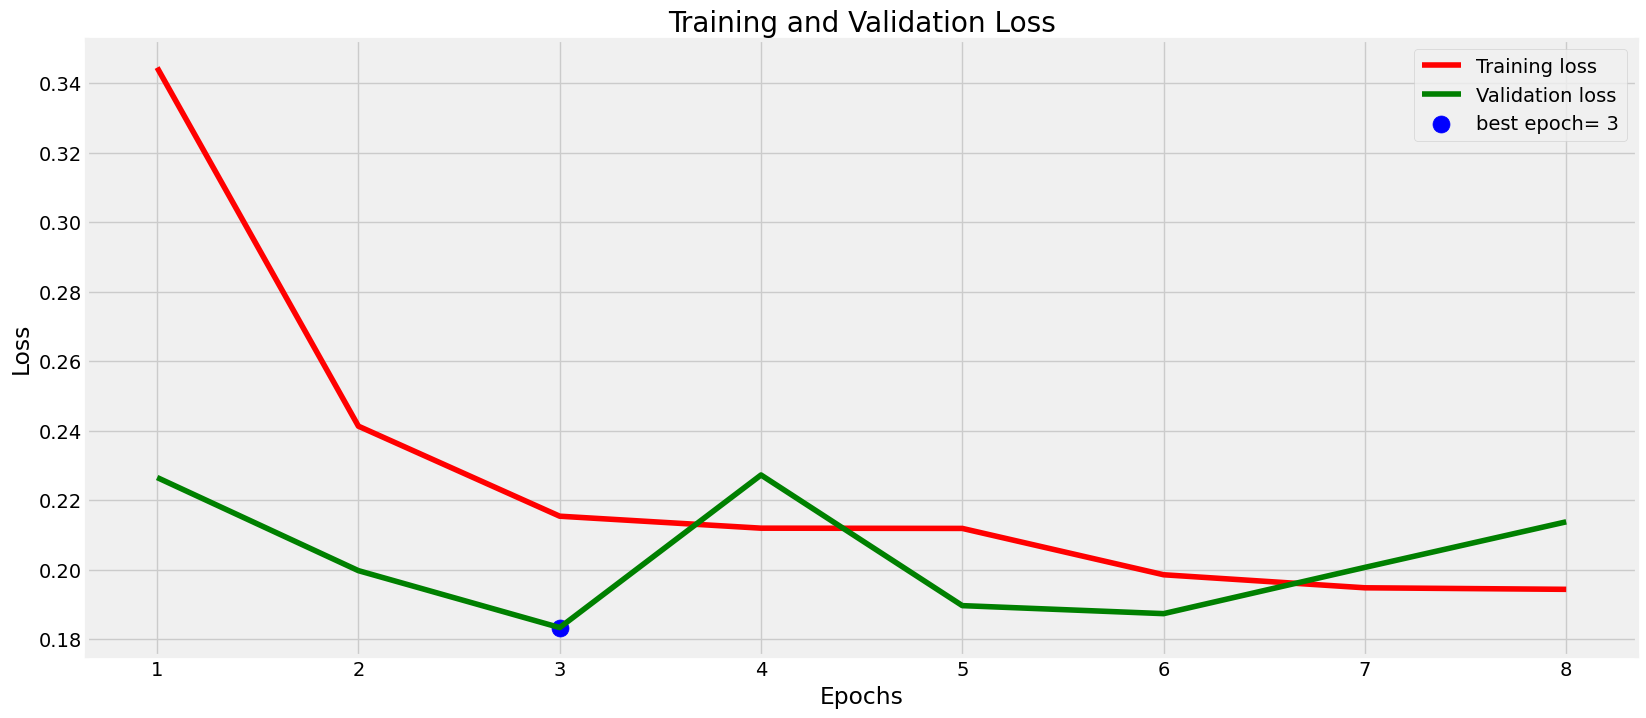

In [110]:
# Define needed variables
tr_loss = history1.history['loss']
val_loss = history1.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

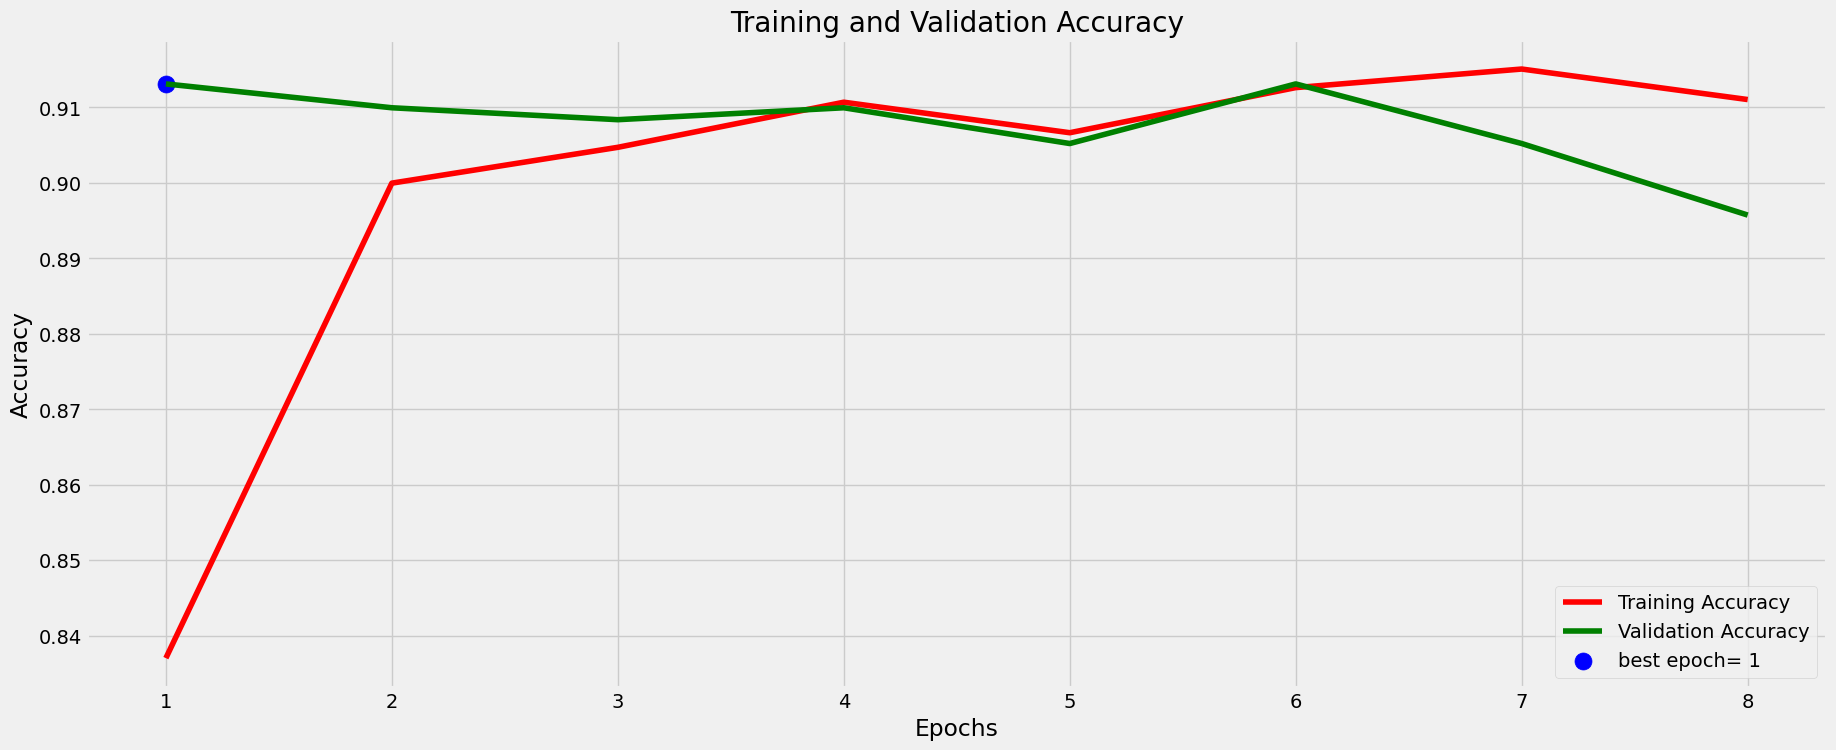

In [111]:
# Define needed variables
tr_accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
index_acc = np.argmax(val_accuracy)
val_highest = val_accuracy[index_acc]

Epochs = [i+1 for i in range(len(tr_accuracy))]
accuracy_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_accuracy, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_accuracy, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s= 150, c= 'blue', label= accuracy_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [112]:
y_pred = model1.predict(X_test)

# Convert probabilities to binary class labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

test_acc = round(accuracy_score(y_pred, y_test) * 100, 3)
acc_loss_df.loc[len(acc_loss_df)] = ['Model 1',test_acc, round((val_highest*100), 3),val_lowest]
test_acc

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


92.745

In [113]:
model2 = Sequential([
    Dense(32, activation='relu' ,input_dim = X_train.shape[1]),
    Dropout(0.4),
    
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss='binary_crossentropy')
model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
call_back2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
history2 = model2.fit(X_train, y_train, callbacks=call_back2, epochs=100, batch_size= 32, validation_split=0.1, verbose=1)

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4518 - loss: 0.7309 - val_accuracy: 0.7472 - val_loss: 0.5799
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.5233 - val_accuracy: 0.8436 - val_loss: 0.3670
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.3978 - val_accuracy: 0.8768 - val_loss: 0.2980
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8620 - loss: 0.3201 - val_accuracy: 0.8957 - val_loss: 0.2638
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.2968 - val_accuracy: 0.9068 - val_loss: 0.2391
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.2717 - val_accuracy: 0.9068 - val_loss: 0.2244
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8922 - loss: 0.2568 - val_accuracy: 0.9084 - val_loss: 0.2168
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.2430 - val_accu

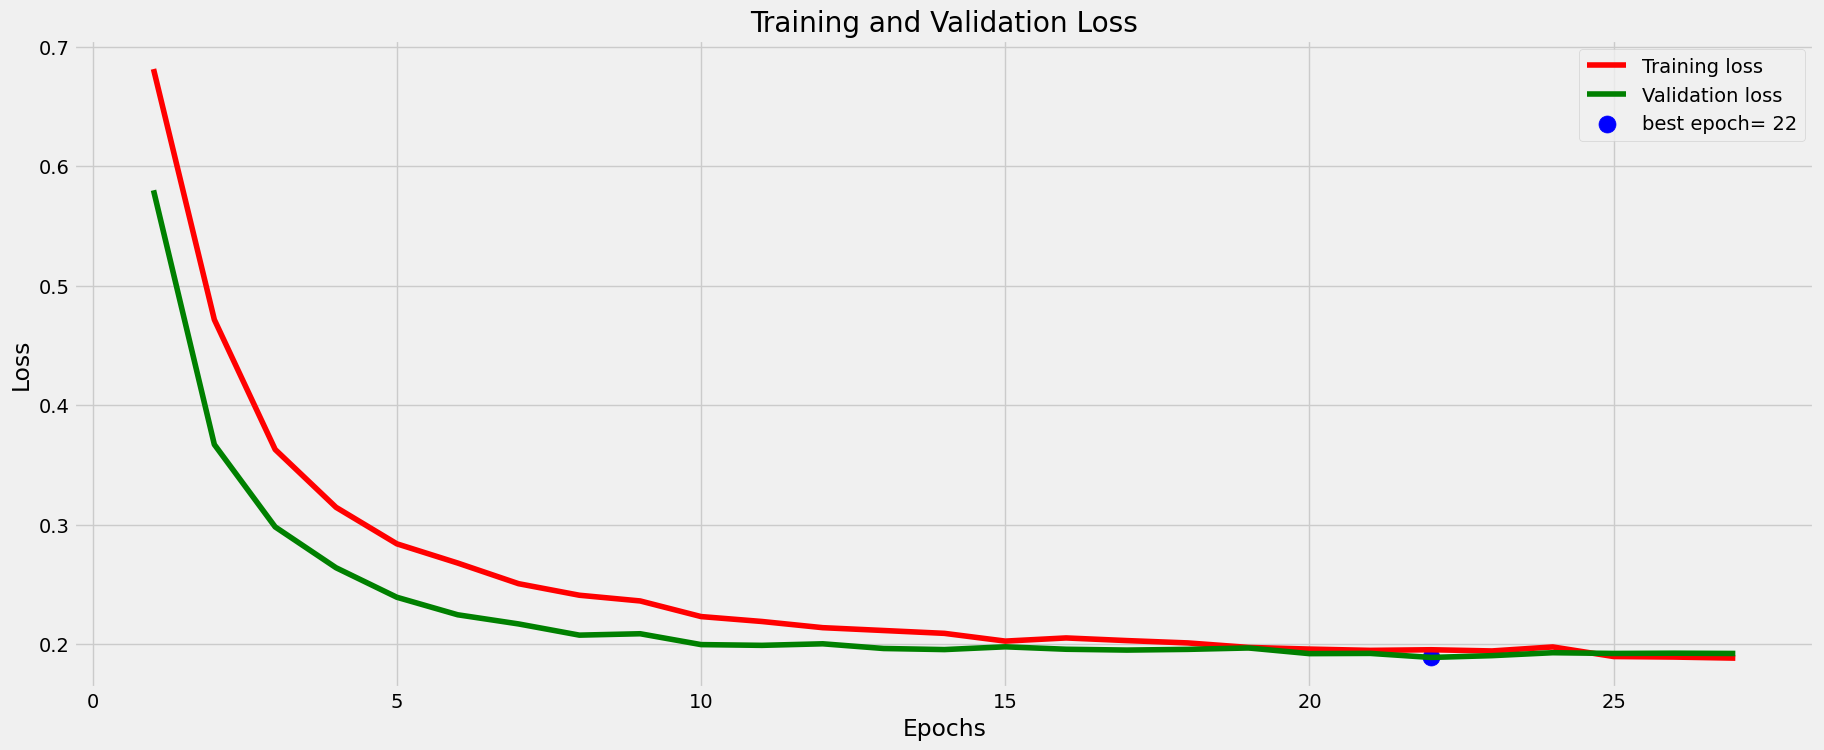

In [115]:
# Define needed variables
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

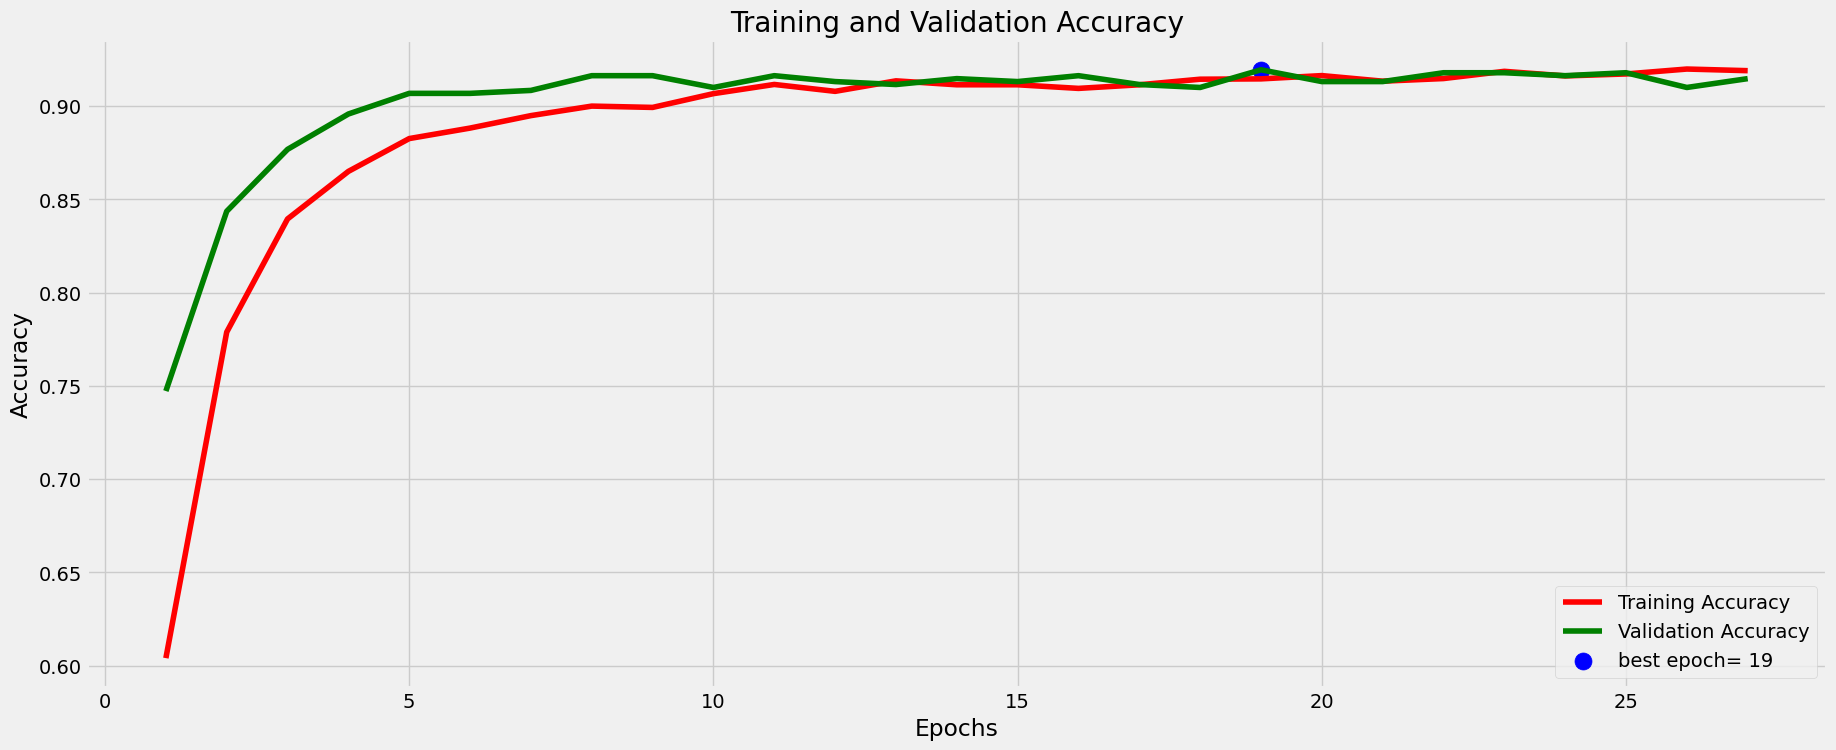

In [116]:
# Define needed variables
tr_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
index_acc = np.argmax(val_accuracy)
val_highest = val_accuracy[index_acc]

Epochs = [i+1 for i in range(len(tr_accuracy))]
accuracy_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_accuracy, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_accuracy, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s= 150, c= 'blue', label= accuracy_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [117]:
y_pred = model2.predict(X_test)

# Convert probabilities to binary class labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

test_acc = round(accuracy_score(y_pred, y_test) * 100, 3)
acc_loss_df.loc[len(acc_loss_df)] = ['Model 2',test_acc, round((val_highest*100), 3),val_lowest]
test_acc

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


92.319

In [118]:
model3 = Sequential([  
    Dense(16, activation='relu', input_dim = X_train.shape[1]),
    
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss='binary_crossentropy')
model3.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
call_back3 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
history3 = model3.fit(X_train, y_train, callbacks=call_back3, epochs=100, batch_size= 32, validation_split=0.1, verbose=1)

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6487 - loss: 0.5996 - val_accuracy: 0.7788 - val_loss: 0.4514
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4183 - val_accuracy: 0.8468 - val_loss: 0.3489
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8615 - loss: 0.3297 - val_accuracy: 0.8957 - val_loss: 0.2729
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8925 - loss: 0.2655 - val_accuracy: 0.9068 - val_loss: 0.2324
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.2183 - val_accuracy: 0.9100 - val_loss: 0.2128
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9216 - loss: 0.2051 - val_accuracy: 0.9115 - val_loss: 0.2026
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9227 - loss: 0.1929 - val_accuracy: 0.9115 - val_loss: 0.1982
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9187 - loss: 0.1864 - val_accu

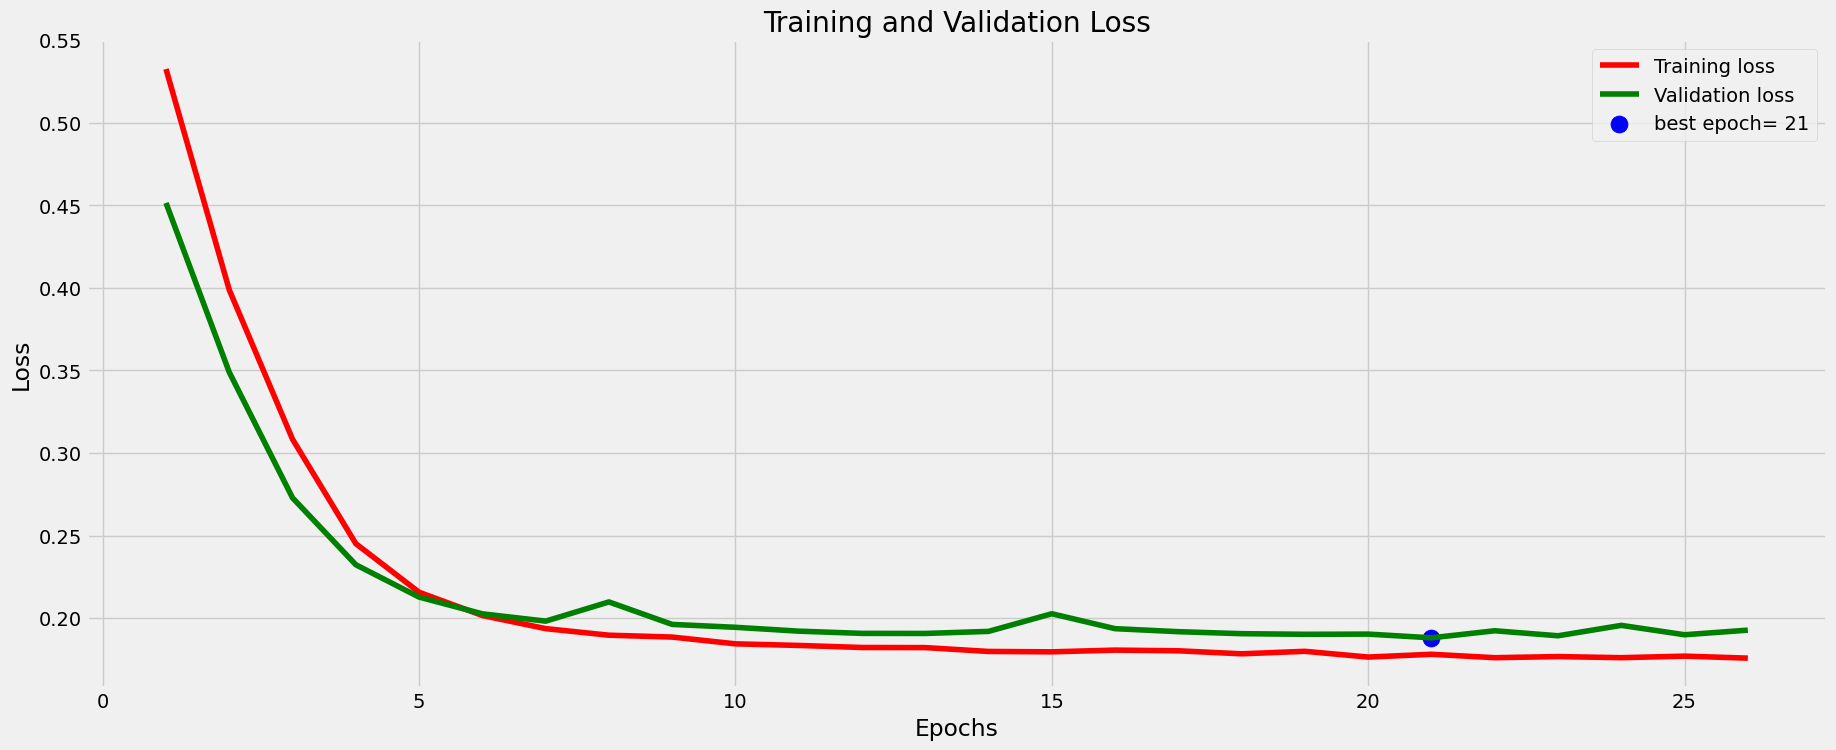

In [120]:
# Define needed variables
tr_loss = history3.history['loss']
val_loss = history3.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

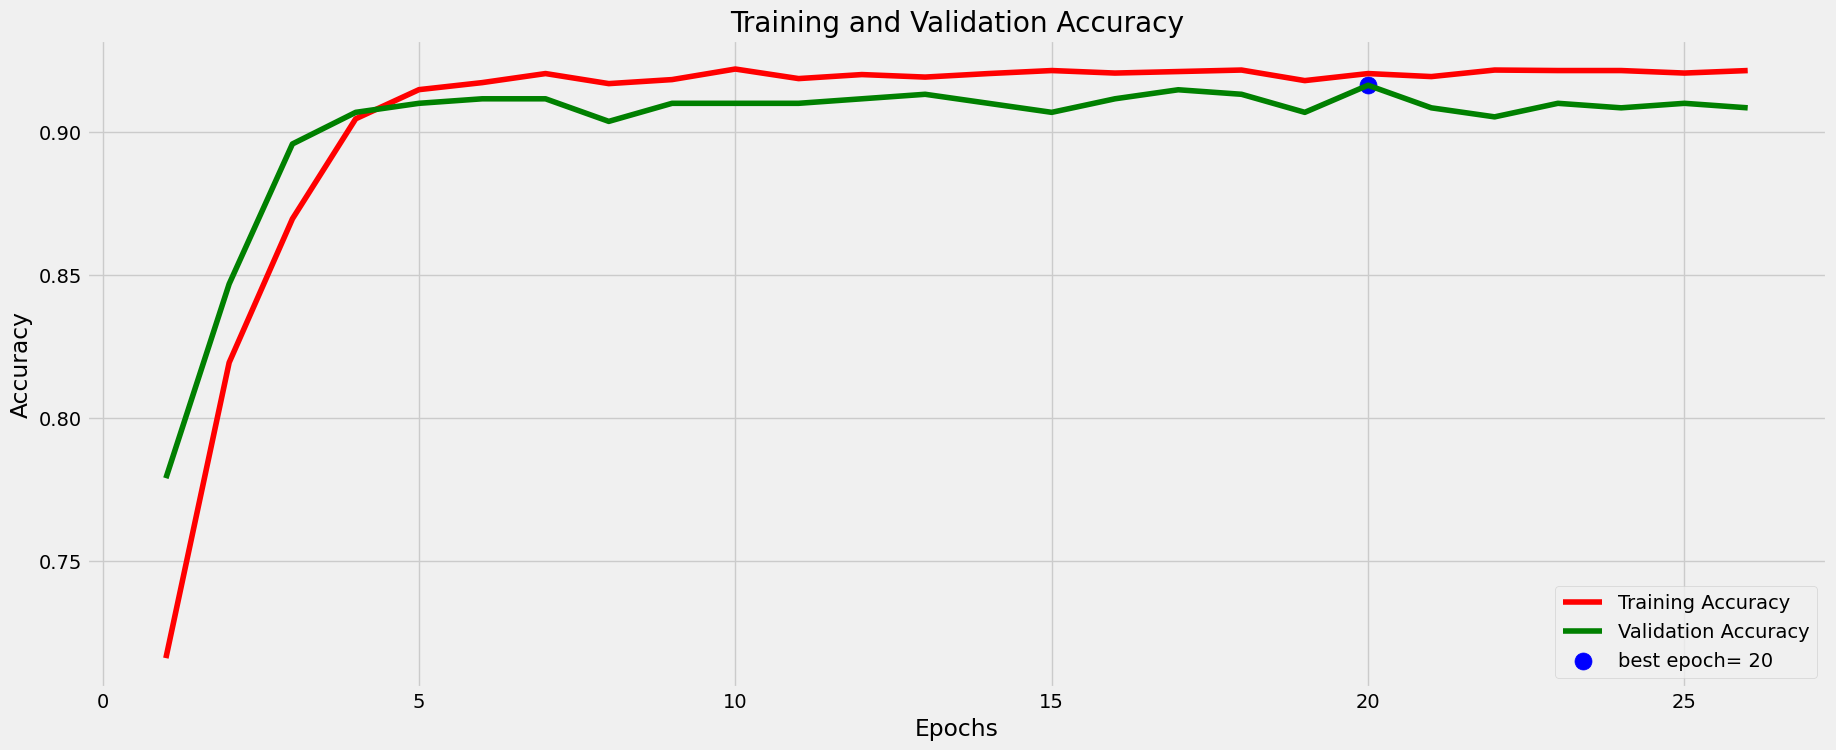

In [121]:
# Define needed variables
tr_accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
index_acc = np.argmax(val_accuracy)
val_highest = val_accuracy[index_acc]

Epochs = [i+1 for i in range(len(tr_accuracy))]
accuracy_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_accuracy, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_accuracy, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s= 150, c= 'blue', label= accuracy_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [122]:
y_pred = model3.predict(X_test)

# Convert probabilities to binary class labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

test_acc = round(accuracy_score(y_pred, y_test) * 100, 3)
acc_loss_df.loc[len(acc_loss_df)] = ['Model 3',test_acc, round((val_highest*100), 3),val_lowest]
test_acc

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


92.176

In [123]:
model4 = Sequential([  
    Dense(8, activation='relu', input_dim = X_train.shape[1]),
    
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss='binary_crossentropy')
model4.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [124]:
call_back4 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
history4 = model4.fit(X_train, y_train, callbacks=call_back4, epochs=100, batch_size= 32, validation_split=0.1, verbose=1)

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7369 - loss: 0.5617 - val_accuracy: 0.7472 - val_loss: 0.4603
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7435 - loss: 0.4461 - val_accuracy: 0.8231 - val_loss: 0.4018
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.3907 - val_accuracy: 0.8547 - val_loss: 0.3538
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8717 - loss: 0.3436 - val_accuracy: 0.8926 - val_loss: 0.3201
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8804 - loss: 0.3254 - val_accuracy: 0.8910 - val_loss: 0.2951
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - loss: 0.2909 - val_accuracy: 0.9005 - val_loss: 0.2772
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.2727 - val_accuracy: 0.9068 - val_loss: 0.2638
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.2628 - val_accu

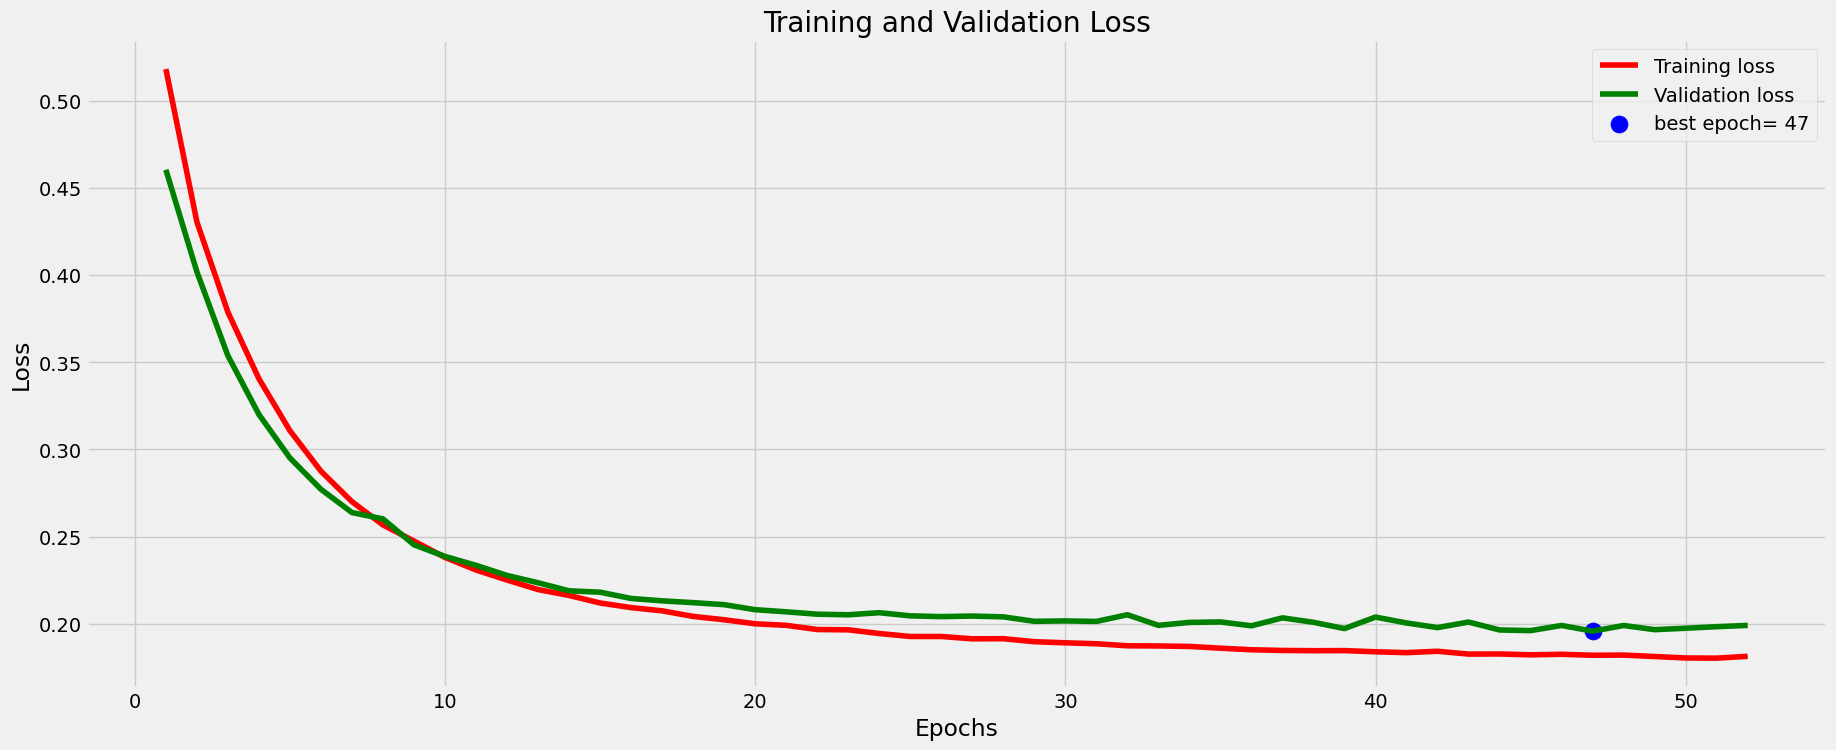

In [125]:
# Define needed variables
tr_loss = history4.history['loss']
val_loss = history4.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

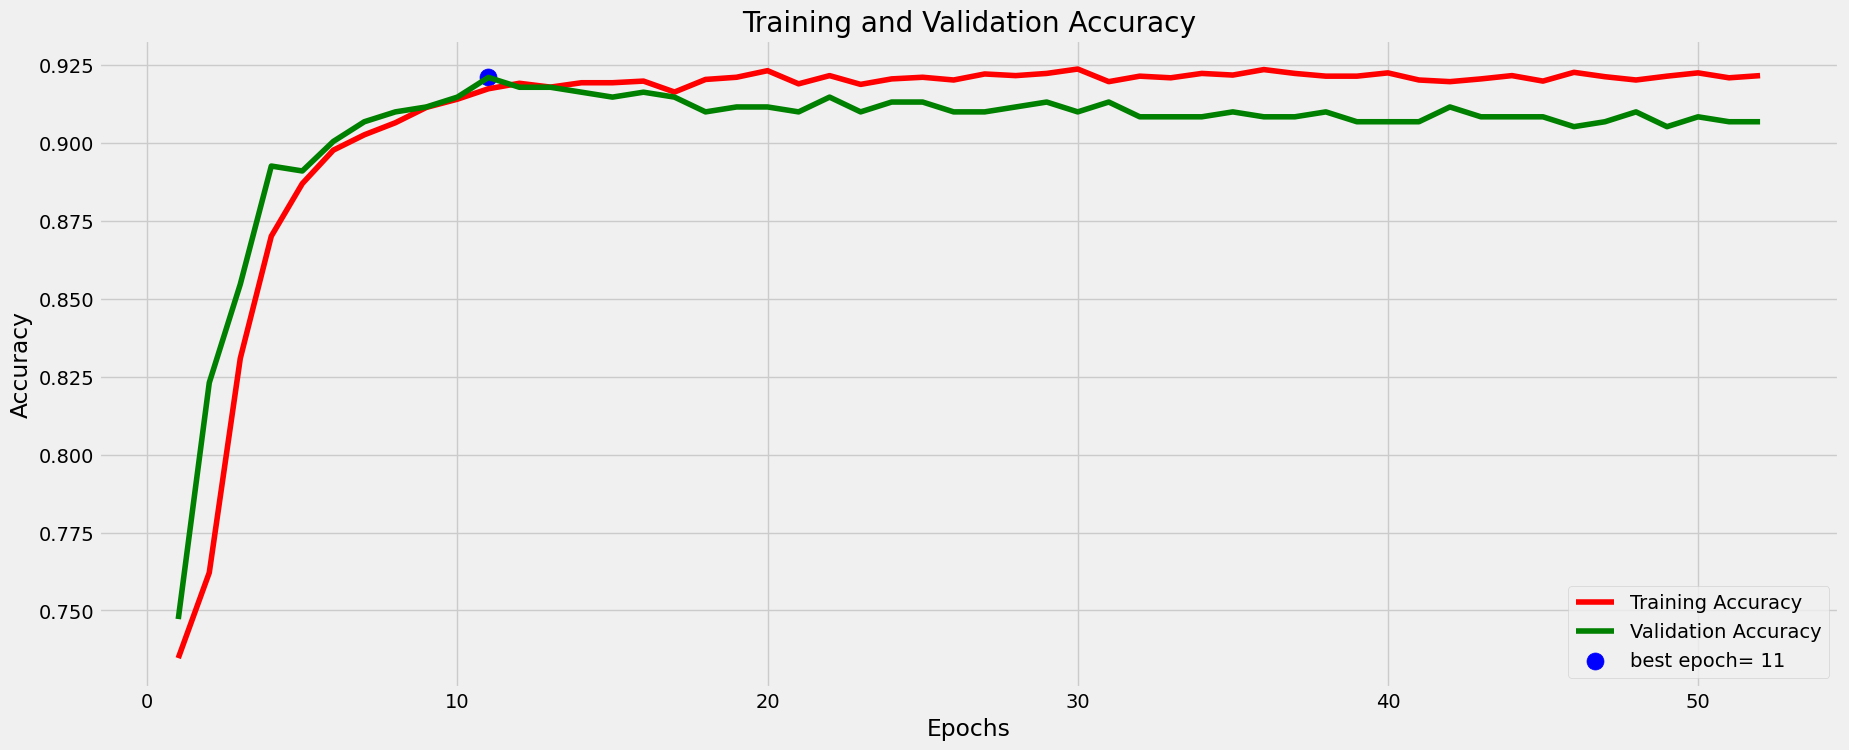

In [126]:
# Define needed variables
tr_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
index_acc = np.argmax(val_accuracy)
val_highest = val_accuracy[index_acc]

Epochs = [i+1 for i in range(len(tr_accuracy))]
accuracy_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_accuracy, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_accuracy, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s= 150, c= 'blue', label= accuracy_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [127]:
y_pred = model4.predict(X_test)

# Convert probabilities to binary class labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

test_acc = round(accuracy_score(y_pred, y_test) * 100, 3)
acc_loss_df.loc[len(acc_loss_df)] = ['Model 4',test_acc, round((val_highest*100), 3),val_lowest]
acc_loss_df

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Model_Name,Test_Accuracy,Val_Accuracy,Val_Loss
0,Model 1,92.745,91.311,0.183298
1,Model 2,92.319,91.943,0.188704
2,Model 3,92.176,91.627,0.188114
3,Model 4,91.607,92.101,0.195875


In [128]:
model5 = Sequential([  
    Dense(8, activation='relu', input_dim = X_train.shape[1]),
    Dense(1, activation='sigmoid')
])

model5.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss='binary_crossentropy')
model5.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [129]:
call_back5 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
history5 = model5.fit(X_train, y_train, callbacks=call_back5, epochs=100, batch_size= 32, validation_split=0.1, verbose=1)

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7400 - loss: 0.5263 - val_accuracy: 0.7852 - val_loss: 0.4303
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.4117 - val_accuracy: 0.8483 - val_loss: 0.3605
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8604 - loss: 0.3470 - val_accuracy: 0.8768 - val_loss: 0.3246
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3155 - val_accuracy: 0.8863 - val_loss: 0.2980
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8770 - loss: 0.3012 - val_accuracy: 0.8894 - val_loss: 0.2791
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8941 - loss: 0.2686 - val_accuracy: 0.8910 - val_loss: 0.2621
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8956 - loss: 0.2624 - val_accuracy: 0.8926 - val_loss: 0.2496
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9065 - loss: 0.2340 - val_accu

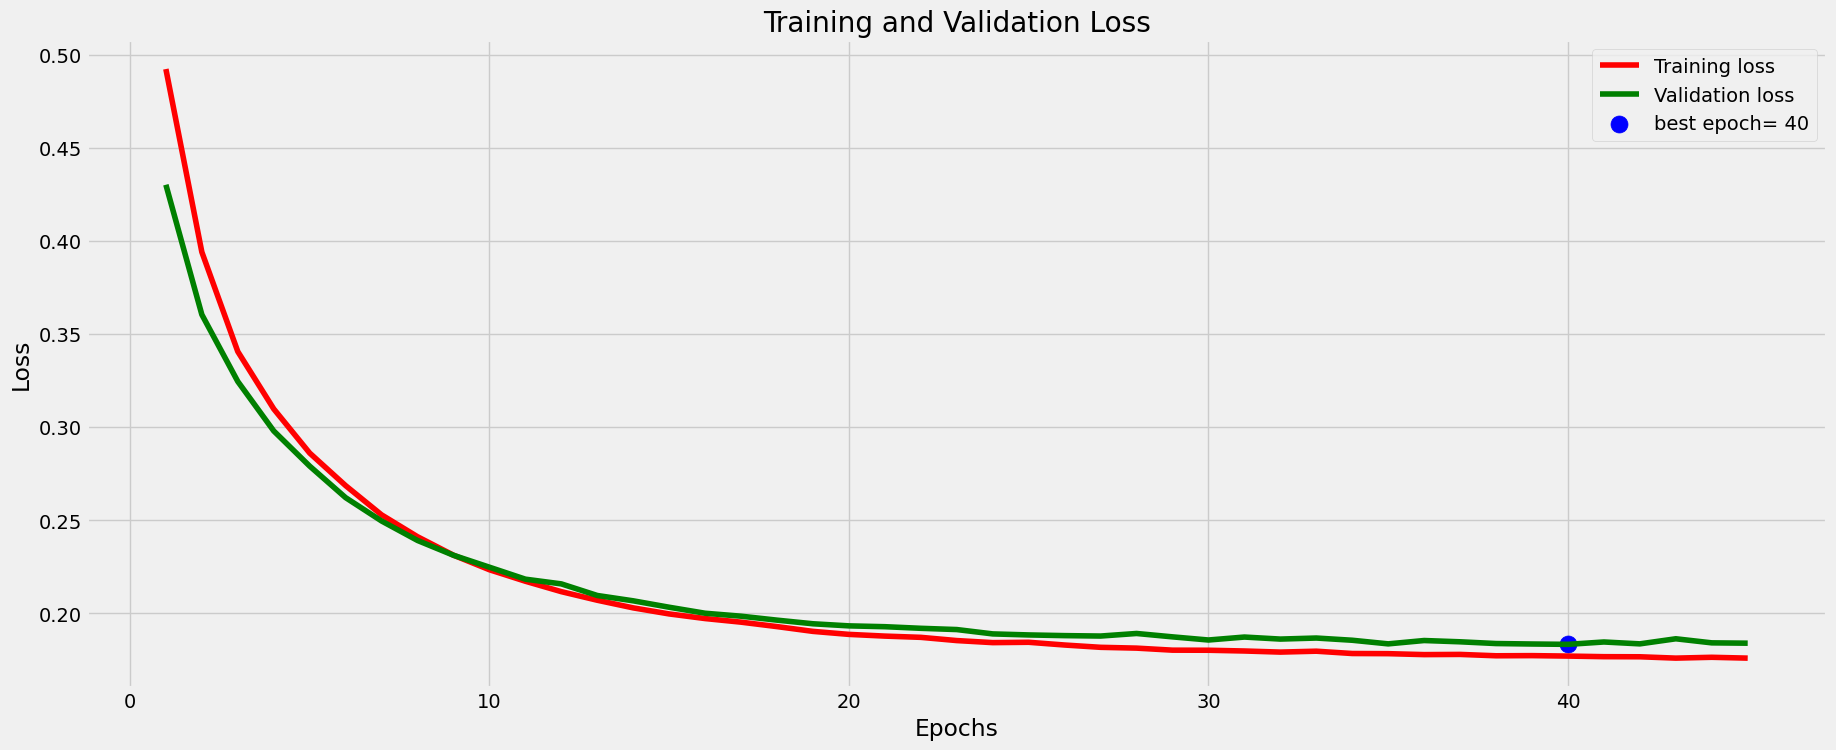

In [130]:
# Define needed variables
tr_loss = history5.history['loss']
val_loss = history5.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

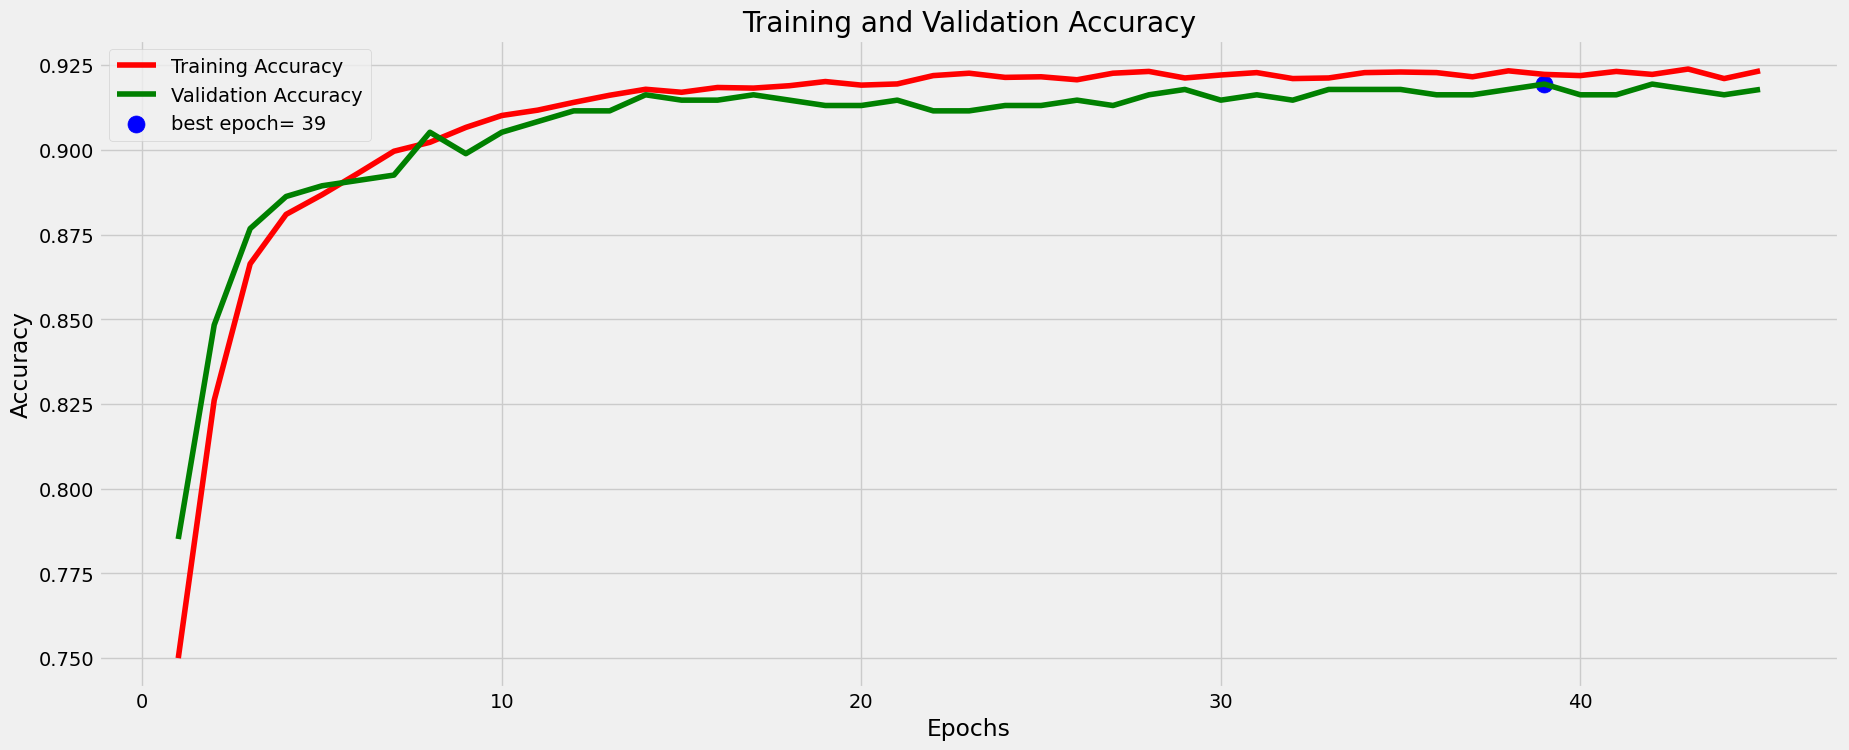

In [131]:
# Define needed variables
tr_accuracy = history5.history['accuracy']
val_accuracy = history5.history['val_accuracy']
index_acc = np.argmax(val_accuracy)
val_highest = val_accuracy[index_acc]

Epochs = [i+1 for i in range(len(tr_accuracy))]
accuracy_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_accuracy, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_accuracy, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s= 150, c= 'blue', label= accuracy_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [132]:
y_pred = model5.predict(X_test)

# Convert probabilities to binary class labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

test_acc = round(accuracy_score(y_pred, y_test) * 100, 3)
acc_loss_df.loc[len(acc_loss_df)] = ['Model 5',test_acc, round((val_highest*100), 3),val_lowest]
acc_loss_df

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Model_Name,Test_Accuracy,Val_Accuracy,Val_Loss
0,Model 1,92.745,91.311,0.183298
1,Model 2,92.319,91.943,0.188704
2,Model 3,92.176,91.627,0.188114
3,Model 4,91.607,92.101,0.195875
4,Model 5,92.888,91.943,0.183326


* **In Concolusion, the highet test score using different ANN Archetictures is 92.888% with the following summary:**

In [134]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

**Thank You!**